In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
h1bdat = pd.read_csv('h1b_kaggle.csv')

In [8]:
temp= pd.read_excel('h1b 2017.xlsx')

In [9]:
temp['YEAR'] = 2017

In [10]:
h1bdat = h1bdat.drop(["WORKSITE","lon","lat"], axis=1)

In [11]:
h1bdat.head(5)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0


In [12]:
temp.head(5)
col = ['CASE_STATUS',
'EMPLOYER_NAME',
'SOC_NAME',
'JOB_TITLE',
'FULL_TIME_POSITION',
'PREVAILING_WAGE',
'YEAR']

In [13]:
temp = temp[col]

In [14]:
temp.head(5)

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR
0,CERTIFIED-WITHDRAWN,DISCOVER PRODUCTS INC.,COMPUTER SYSTEMS ANALYSTS,ASSOCIATE DATA INTEGRATION,Y,59197.0,2017
1,CERTIFIED-WITHDRAWN,DFS SERVICES LLC,OPERATIONS RESEARCH ANALYSTS,SENIOR ASSOCIATE,Y,49800.0,2017
2,CERTIFIED-WITHDRAWN,EASTBANC TECHNOLOGIES LLC,COMPUTER PROGRAMMERS,.NET SOFTWARE PROGRAMMER,Y,76502.0,2017
3,WITHDRAWN,INFO SERVICES LLC,"COMPUTER OCCUPATIONS, ALL OTHER",PROJECT MANAGER,Y,90376.0,2017
4,CERTIFIED-WITHDRAWN,BB&T CORPORATION,CREDIT ANALYSTS,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,Y,116605.0,2017


In [15]:
h1bdat = pd.concat([h1bdat,temp], ignore_index=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


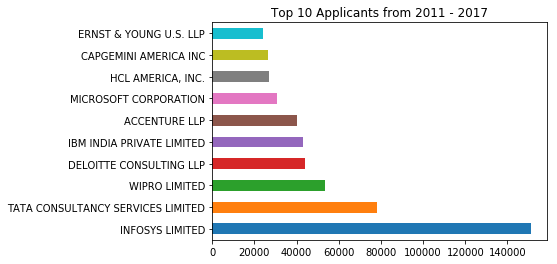

In [16]:
ax3 = h1bdat['EMPLOYER_NAME'].groupby([h1bdat['EMPLOYER_NAME']]).count().sort_values(ascending=False).head(10).plot(kind='barh', title="Top 10 Applicants from 2011 - 2017")
ax3.set_ylabel("")
plt.savefig('top_10_applicants')
plt.show()

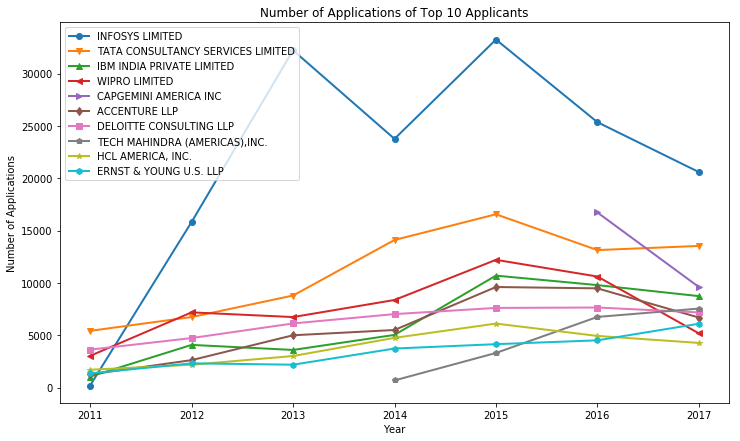

In [17]:
topEmp = list(h1bdat['EMPLOYER_NAME'][h1bdat['YEAR'] >= 2015.0].groupby(h1bdat['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)
byEmpYear = h1bdat[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][h1bdat['EMPLOYER_NAME'].isin(topEmp)]
byEmpYear = byEmpYear.groupby([h1bdat['EMPLOYER_NAME'],h1bdat['YEAR']])
markers=['o','v','^','<','>','d','s','p','*','h','x','D','o','v','^','<','>','d','s','p','*','h','x','D']
fig = plt.figure(figsize=(12,7))
for company in topEmp:
    tmp = byEmpYear.count().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2,marker=markers[topEmp.index(company)])
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.legend()
plt.title('Number of Applications of Top 10 Applicants')
plt.savefig('number_of_applications_top_10')
plt.show()


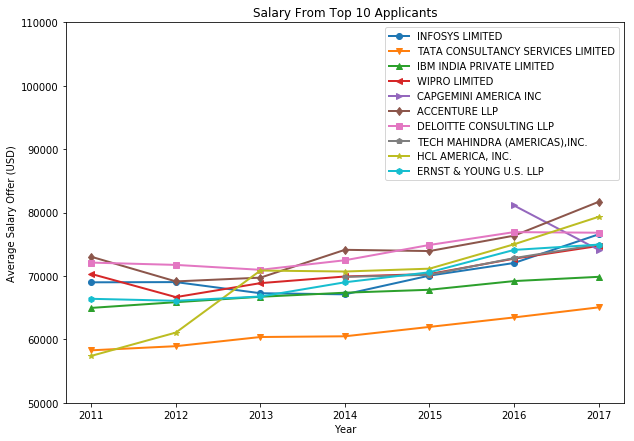

In [18]:
h1bdat = h1bdat[h1bdat['PREVAILING_WAGE'] <= 500000]
byEmpYear = h1bdat[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][h1bdat['EMPLOYER_NAME'].isin(topEmp)]
byEmpYear = byEmpYear.groupby([h1bdat['EMPLOYER_NAME'],h1bdat['YEAR']])
fig = plt.figure(figsize=(10,7))
for company in topEmp:
    tmp = byEmpYear.mean().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2,  marker=markers[topEmp.index(company)])
        
plt.ylim(50000,110000)
plt.xlabel("Year")
plt.ylabel("Average Salary Offer (USD)")
plt.legend()
plt.title("Salary From Top 10 Applicants")
plt.savefig('salary_top_10')
plt.show()

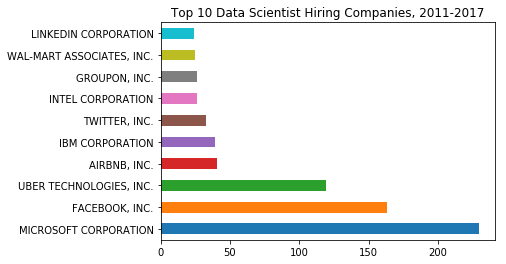

In [33]:
ax1 = h1bdat[h1bdat['JOB_TITLE'] == "DATA SCIENTIST"]['EMPLOYER_NAME'].groupby(h1bdat['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title="Top 10 Data Scientist Hiring Companies, 2011-2017")
ax1.set_ylabel("")
plt.savefig('top10datascience')
plt.show()

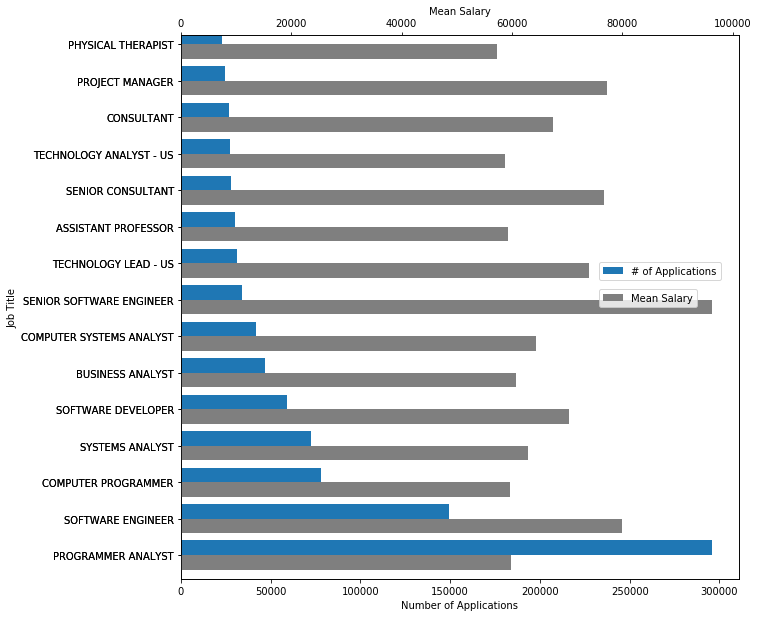

In [39]:
PopJobs2016 = h1bdat[['JOB_TITLE', 'EMPLOYER_NAME', 'PREVAILING_WAGE','YEAR']]
PopJobs2016 = PopJobs2016.groupby(['JOB_TITLE'])
topJobs2016 = list(PopJobs2016.count().sort_values(by='EMPLOYER_NAME', ascending=False).head(15).index)
df2016 = PopJobs2016.count().loc[topJobs2016].assign(mean_wage=PopJobs2016.mean().loc[topJobs2016]['PREVAILING_WAGE'])
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
width = 0.35
df2016.EMPLOYER_NAME.plot(kind='barh', ax=ax1, color='C0', width=0.4, position=0, label='# of Applications')
df2016.mean_wage.plot(kind='barh', ax=ax2, color='C7', width=0.4, position=1, label='Mean Salary')
ax1.set_xlabel('Number of Applications')
ax1.set_ylabel('')
ax1.legend(loc=(0.75,0.55))
ax2.set_xlabel('Mean Salary')
ax2.set_ylabel('Job Title')
ax2.legend(loc=(0.75,0.50))
plt.show()